In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [4]:
file_path = "bitcoin.csv"
df = pd.read_csv(file_path)

df.head()

,Date,Open,High,Low,Close,Volume,PriceCategory
0,2010-01-01,0.3,0.303428,0.295510,0.3,715.8,Low
1,2010-01-02,0.3,0.304377,0.299459,0.3,2028.3,Low
2,2010-01-03,0.3,0.303736,0.295858,0.3,273.0,Low
3,2010-01-04,0.3,0.303406,0.298489,0.3,1452.0,Low
4,2010-01-05,0.3,0.302715,0.296330,0.3,1002.6,Low


In [5]:
print("Shape:", df.shape)
df.info()

Shape: (5883, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5883 non-null   object 
 1   Open           5883 non-null   float64
 2   High           5883 non-null   float64
 3   Low            5883 non-null   float64
 4   Close          5883 non-null   float64
 5   Volume         5883 non-null   float64
 6   PriceCategory  5883 non-null   object 
dtypes: float64(5), object(2)
memory usage: 321.9+ KB


In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,5883,5883,2010-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,5883.0,NaN,NaN,NaN,21725.051095,30114.978682,0.3,430.57,7193.6,42265.19,93429.2
High,5883.0,NaN,NaN,NaN,21973.716194,30445.256528,0.300327,431.211444,7207.97899,42370.135719,95281.011865
Low,5883.0,NaN,NaN,NaN,21487.576193,29793.029792,0.294003,422.134483,7057.971811,41483.578807,93326.44548
Close,5883.0,NaN,NaN,NaN,21736.779754,30119.952256,0.3,430.57,7193.6,42265.19,93429.2
Volume,5883.0,NaN,NaN,NaN,108791503.103174,185109840.666279,30.3,1271205.315,17568092.4,130229682.105,932516845.2
PriceCategory,5883,3,Low,2191,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum().sort_values(ascending=False)

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
PriceCategory    0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode(dropna=True)[0])

print("Total missing after cleaning:", df.isna().sum().sum())

Total missing after cleaning: 0


In [9]:
date_col = None
for c in df.columns:
    if "date" in c.lower() or "time" in c.lower():
        date_col = c
        break

print("Detected date column:", date_col)

Detected date column: Date


In [10]:
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.sort_values(date_col)
    print("Date converted and data sorted.")
else:
    print("No date column found. We'll use index for plots.")

Date converted and data sorted.


In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

moments = pd.DataFrame({
    "Mean": df[num_cols].mean(numeric_only=True),
    "Variance": df[num_cols].var(ddof=1, numeric_only=True),
    "Skewness": df[num_cols].skew(numeric_only=True),
    "Kurtosis": df[num_cols].kurt(numeric_only=True)  # excess kurtosis
})

moments

,Mean,Variance,Skewness,Kurtosis
Open,2.172505e+04,9.069119e+08,1.389508,0.617368
High,2.197372e+04,9.269136e+08,1.388264,0.613457
Low,2.148758e+04,8.876246e+08,1.390149,0.619426
Close,2.173678e+04,9.072115e+08,1.388372,0.613800
Volume,1.087915e+08,3.426565e+16,2.290440,5.021849


Using numeric column for step plot: Open


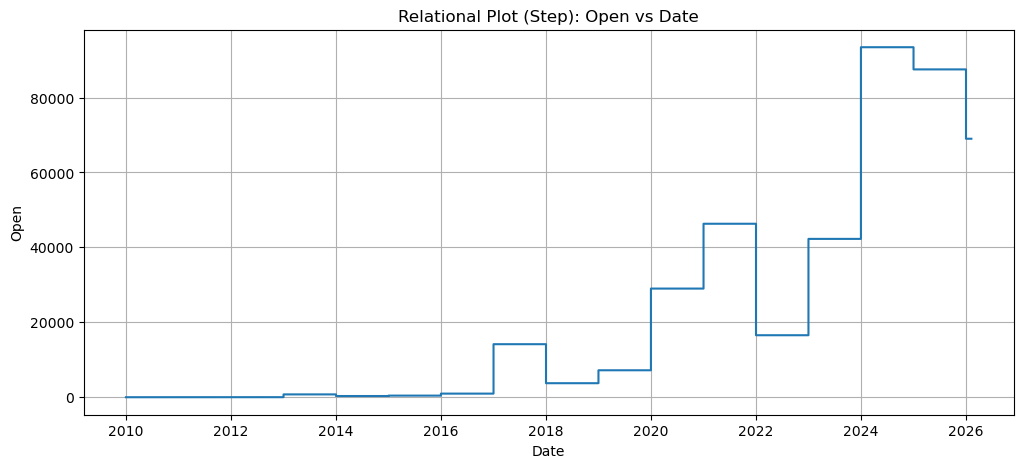

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols) == 0:
    print("No numeric columns found for step plot.")
else:
    y_col = num_cols[0]  # change if you want e.g. 'Close'
    print("Using numeric column for step plot:", y_col)

    if date_col is not None:
        temp = df[[date_col, y_col]].dropna().sort_values(date_col)
        x = temp[date_col]
        y = temp[y_col]
        x_label = date_col
    else:
        x = df.index
        y = df[y_col]
        x_label = "Index"

    plt.figure(figsize=(12,5))
    plt.step(x, y, where="mid")
    plt.title(f"Relational Plot (Step): {y_col} vs {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

Using column for histogram: Open


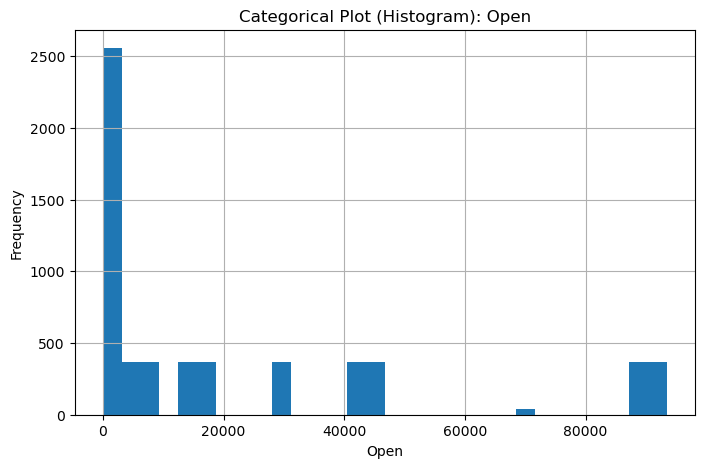

In [13]:
if len(num_cols) == 0:
    print("No numeric columns found for histogram.")
else:
    hist_col = num_cols[0]  # change if needed
    print("Using column for histogram:", hist_col)

    plt.figure(figsize=(8,5))
    plt.hist(df[hist_col].dropna(), bins=30)
    plt.title(f"Categorical Plot (Histogram): {hist_col}")
    plt.xlabel(hist_col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

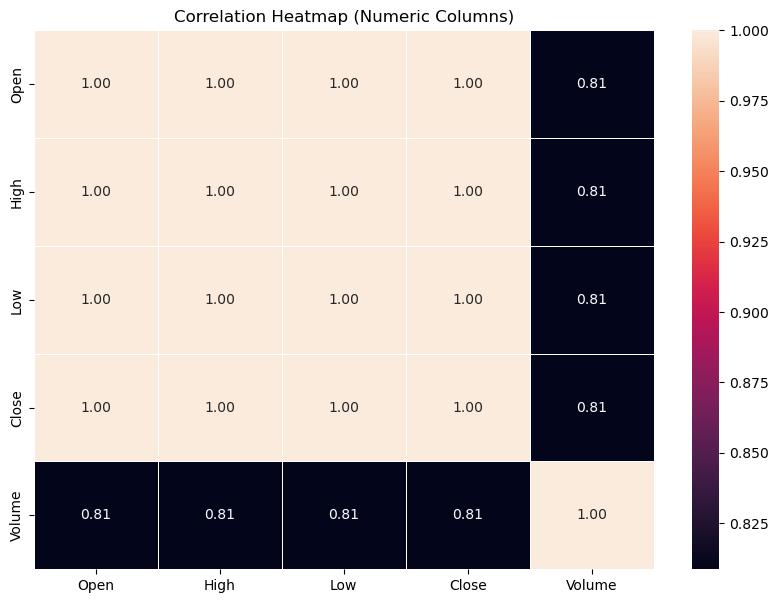

In [14]:
num_df = df.select_dtypes(include=[np.number])

if num_df.shape[1] < 2:
    print("Not enough numeric columns for correlation heatmap (need at least 2).")
else:
    corr = num_df.corr()

    plt.figure(figsize=(10,7))
    sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap (Numeric Columns)")
    plt.show()